<a href="https://colab.research.google.com/github/smiley24/InQRy/blob/master/mp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
sns.set()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  *
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import DenseNet121, VGG19, ResNet50

import PIL.Image
import matplotlib.pyplot as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from sklearn.utils import shuffle

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Chest_xray_Corona_Metadata.csv')
train_df.shape

(5910, 6)

In [ ]:
train_df.head(450)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
445,445,IM-0583-0001.jpeg,Normal,TRAIN,NaN,NaN
446,446,IM-0582-0001.jpeg,Normal,TRAIN,NaN,NaN
447,447,IM-0641-0001.jpeg,Normal,TRAIN,NaN,NaN
448,448,IM-0640-0001.jpeg,Normal,TRAIN,NaN,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


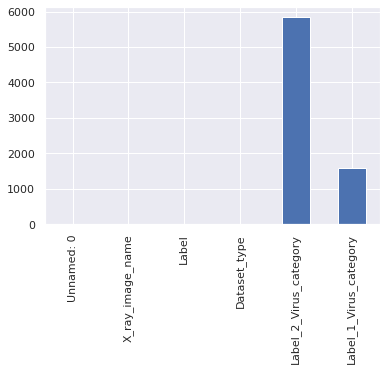

In [ ]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')


In [ ]:
train_df.dropna(how = 'all')
train_df.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [ ]:
train_df.fillna('unknown', inplace=True)
train_df.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [ ]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5802,5825,person53_virus_108.jpeg,Pnemonia,TEST,unknown,Virus
5667,5690,person117_bacteria_553.jpeg,Pnemonia,TEST,unknown,bacteria
5531,5554,person161_bacteria_759.jpeg,Pnemonia,TEST,unknown,bacteria
5602,5625,person136_bacteria_654.jpeg,Pnemonia,TEST,unknown,bacteria
5814,5837,person43_virus_92.jpeg,Pnemonia,TEST,unknown,Virus
5805,5828,person51_virus_105.jpeg,Pnemonia,TEST,unknown,Virus
5458,5481,NORMAL2-IM-0171-0001.jpeg,Normal,TEST,unknown,unknown
5416,5439,NORMAL2-IM-0282-0001.jpeg,Normal,TEST,unknown,unknown
5359,5382,IM-0043-0001.jpeg,Normal,TEST,unknown,unknown
5623,5646,person130_bacteria_626.jpeg,Pnemonia,TEST,unknown,bacteria


In [ ]:
print((train_df['Label_1_Virus_category']).value_counts())
print('--------------------------')
print((train_df['Label_2_Virus_category']).value_counts())

bacteria          2777
unknown           1576
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
--------------------------
unknown          5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64


In [ ]:
import os
test_img_dir = '/content/drive/MyDrive/Chest_xray_Corona_Metadata (1).csv/test'
train_img_dir = '/content/drive/MyDrive/Chest_xray_Corona_Metadata (1).csv/train'


sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))

sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))

IndexError: ignored